In [86]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import circulant
# load the numpy txt from a file 
data = np.loadtxt('data/curves/dino_noisy.txt')
true_data = np.loadtxt('data/curves/dino.txt')
from IPython.display import display, clear_output
len(data)

200

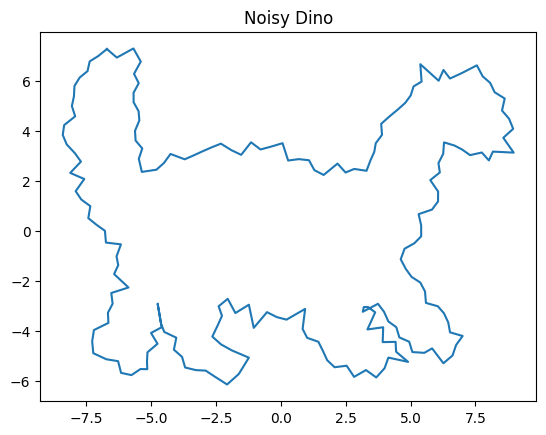

In [87]:
# plot the dino 
plt.figure()
# repeats the first point at the end to close the curve
data_closed = np.vstack([data, data[0]])
plt.plot(data_closed[:,0], data_closed[:,1], '-')
plt.title("Noisy Dino")
plt.show()


In [88]:
len(data)

200

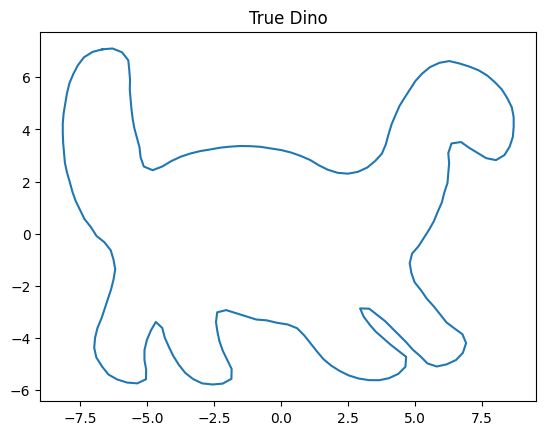

In [89]:
plt.figure()
# repeats the first point at the end to close the curve
true_data_closed = np.vstack([true_data, true_data[0]])
plt.plot(true_data_closed[:,0], true_data_closed[:,1], '-')
plt.title("True Dino")
plt.show()


#### Trial hand implementation by myself wtaking the previous, currend and next elements and smoothing by their average. (Not an exercise)

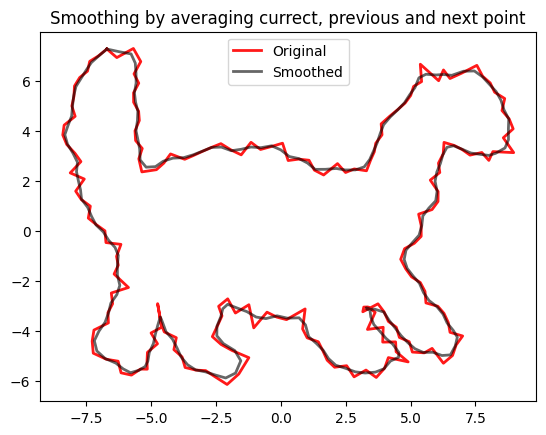

In [90]:
# create a copy of the data 
new_data = np.copy(data)
new_data = np.vstack([data, data[0]])
for i in range(1, new_data.shape[0] - 1):
    # get a previous and next point
    if i == 0:
        prev = current
    elif i == len(new_data) - 1:
        next = current
    prev = new_data[i-1]
    next = new_data[i+1]
    current = new_data[i]
    new_data[i] = np.mean([prev, current, next], axis=0)


# plot the new and old 
plt.figure()
plt.title("Smoothing by averaging currect, previous and next point")
plt.plot(data_closed[:,0], data_closed[:,1], '-', label="Original", alpha=0.9, color='red', linewidth=2)
plt.plot(new_data[:,0], new_data[:,1], '-', label="Smoothed", color='black', linewidth=2, alpha=0.6)
plt.legend()
plt.show()



##### Scipy circulant matrix

The circulant matrix is a special kind of Toeplitz matrix where each row is rotated one element to the right relative to the preceding row. The circulant matrix is completely determined by the first row. The first row of the circulant matrix is the first row of the matrix, and the remaining rows are rotations of the first row. The circulant matrix is a special case of a Toeplitz matrix, where all the diagonals are constant. The circulant matrix is a special case of a Hankel matrix, where all the diagonals are constant.

- parameters: 
    - c (…, N,) array_like. The first column(s) of the matrix. Multidimensional arrays are treated as a batch: each slice along the last axis is the first column of an output matrix.
- Returns:
    - out (…, N, N) ndarray. A circulant matrix.
    A circulant matrix whose first column is given by c. For batch input, each slice of shape (N, N) along the last two dimensions of the output corresponds with a slice of shape (N,) along the last dimension of the input.

In [178]:
# The matrix dimension 
N = 200 

# fill the matrix with zeroes
L = np.zeros(N)
# fill diagonals with -2
L[0] = -2
# fill the row above the main diagonal with 1
L[1] = 1
# fill the row below the main diagonal with 1
L[-1] = 1

# create the matrix
L = circulant(L)
print(L)

[[-2.  1.  0. ...  0.  0.  1.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 1.  0.  0. ...  0.  1. -2.]]


Equation 1.10 

$$X_{new} = (\mathbf{I} + \lambda \mathbf{L}) \mathbf{X}$$

In [179]:
LAMBDA = 0.9         # Smoothing factor
I = np.eye(N) # N x N identity matrix
X_new = (I + LAMBDA*L) @ data

#### Applying the equation 1.10 to the data to smooth it.

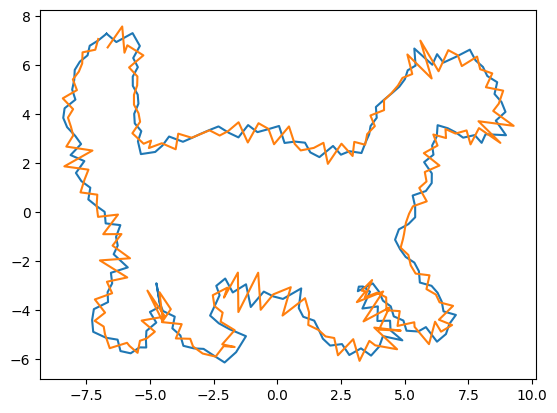

In [180]:
# plot the new and old
plt.figure()
plt.plot(data_closed[:,0], data_closed[:,1], '-')
plt.plot(X_new[:,0], X_new[:,1], '-')
plt.show()


In [181]:
def smoothing_equation_1_10(data, LAMBDA=0.5, iterations=10, true_data=None):
    N = data.shape[0]
    L = np.zeros(N)
    L[0] = -2
    L[1] = 1
    L[-1] = 1
    L = circulant(L)
    I = np.eye(N)
    X_new = (I + LAMBDA*L) @ data

    fig, ax = plt.subplots()

    for _ in range(iterations):
        ax.clear()
        X_new = (I + LAMBDA*L) @ X_new

        ax.plot(X_new[:,0], X_new[:,1], '-', label="Smoothed dyno")
        ax.set_title(rf"Iteration {_ + 1} with $\lambda=${LAMBDA}")
        clear_output(wait=True)
        display(fig)
    #plt.show()
    if true_data is not None:
        print("Plotting the ground truth")
        ax.plot(true_data[:,0], true_data[:,1], '-', label="True dyno")
            
    ax.legend()
    plt.show()
    plt.close(fig)

#### Itterating over the data to smooth it with the initial lambda=0.5 and 20 iterations.

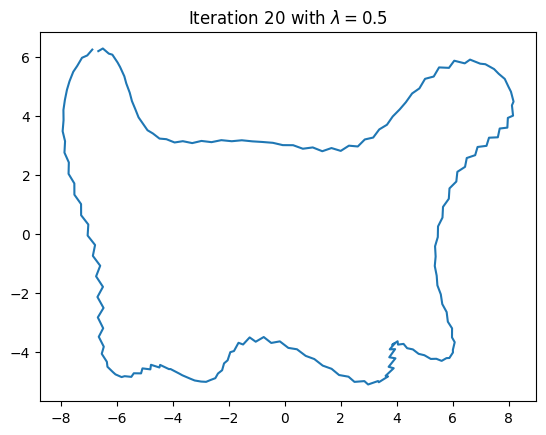

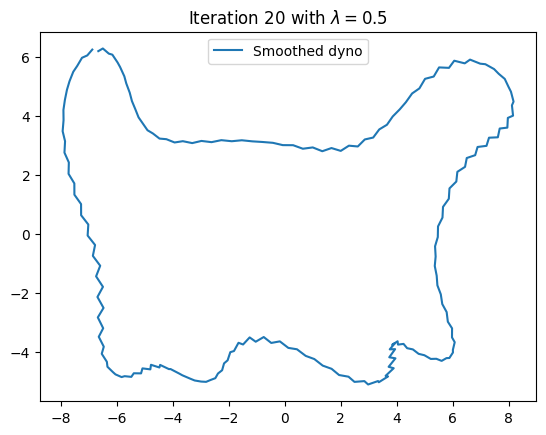

In [182]:
smoothing_equation_1_10(data, LAMBDA=0.5, iterations=20)

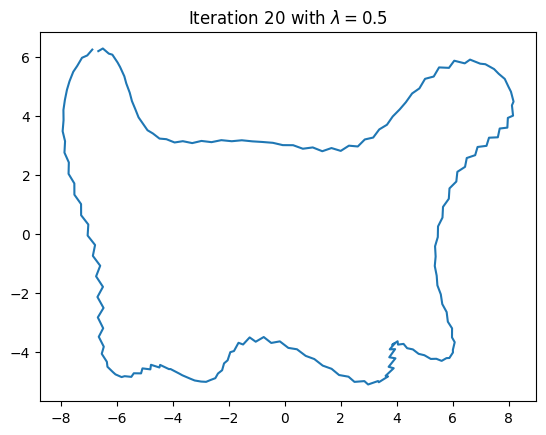

Plotting the ground truth


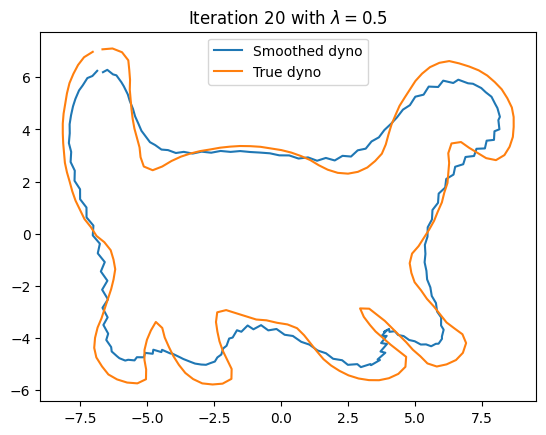

In [183]:
smoothing_equation_1_10(data, LAMBDA=0.5, iterations=20, true_data=true_data)

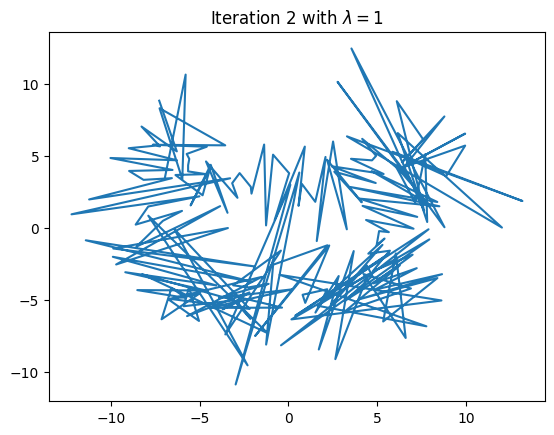

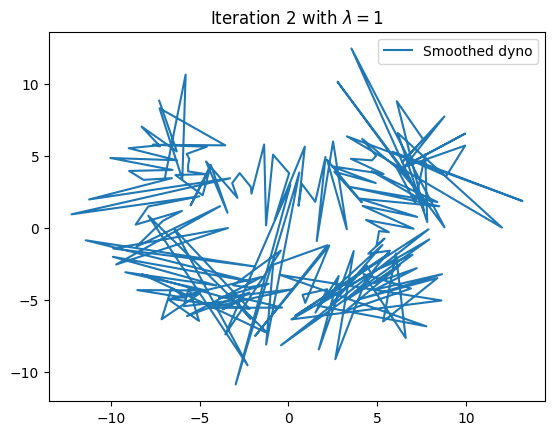

In [184]:
smoothing_equation_1_10(data, LAMBDA=1, iterations=2)

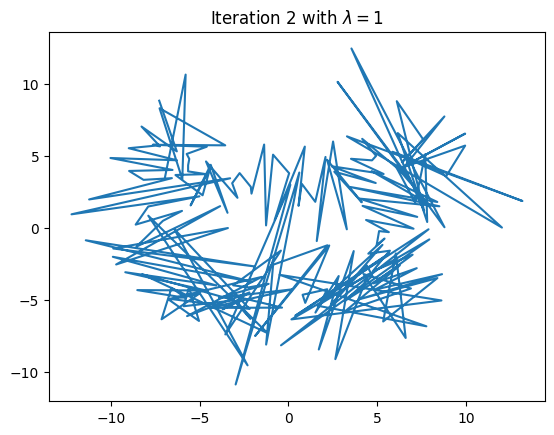

Plotting the ground truth


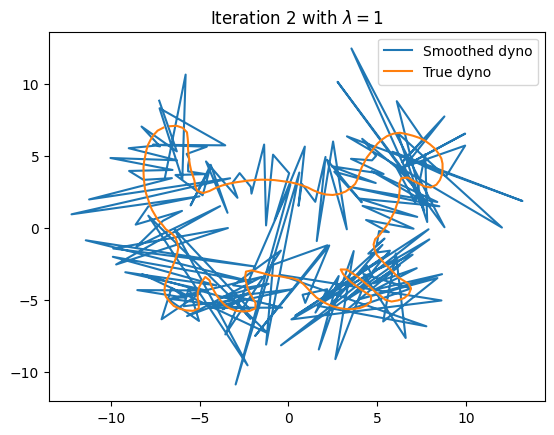

In [185]:
smoothing_equation_1_10(data, LAMBDA=1, iterations=2, true_data=true_data)

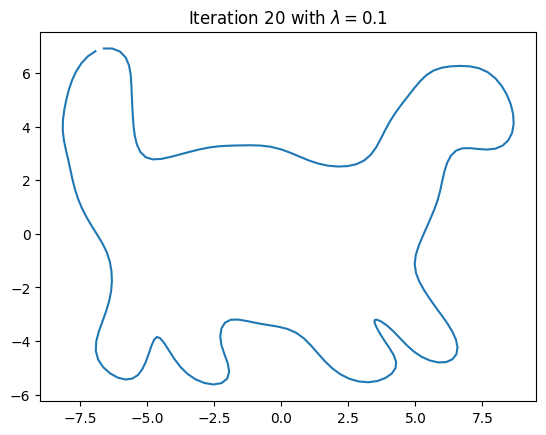

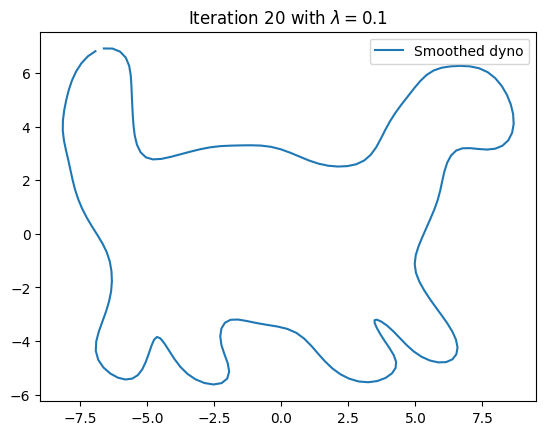

In [186]:
smoothing_equation_1_10(data, LAMBDA=0.1, iterations=20)

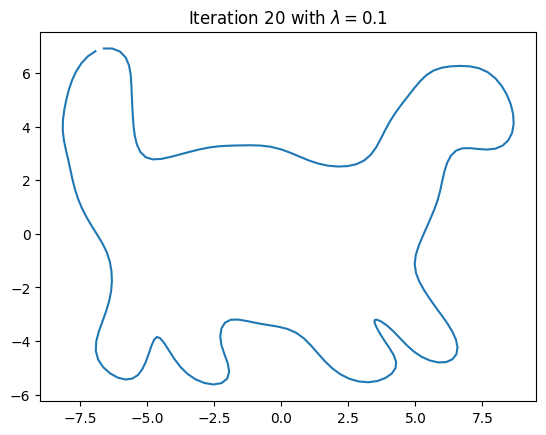

Plotting the ground truth


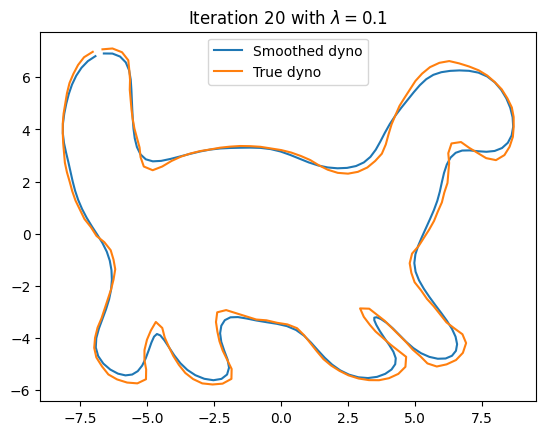

In [187]:
smoothing_equation_1_10(data, LAMBDA=0.1, iterations=20, true_data=true_data)

#### Implementing the quation 1.12 

$$ X_{new} = (I + \lambda L)^{-1} X $$

In [199]:
def smoothing_equation_1_12(data, LAMBDA=0.5, true_data=None):
    N = data.shape[0]
    L = np.zeros(N)
    L[0] = -2
    L[1] = 1
    L[-1] = 1
    L = circulant(L)
    I = np.eye(N)
    X_new = np.linalg.inv(I - LAMBDA*L) @ data

    plt.figure()
    plt.plot(X_new[:,0], X_new[:,1], '-')
    plt.title(rf"Smoothing with $\lambda=${LAMBDA}")
    plt.show()

    if true_data is not None:
        plt.figure()
        plt.plot(true_data[:,0], true_data[:,1], '-')
        plt.plot(X_new[:,0], X_new[:,1], '-')
        plt.title(rf"Smoothing with $\lambda=${LAMBDA}")
        plt.show()
    



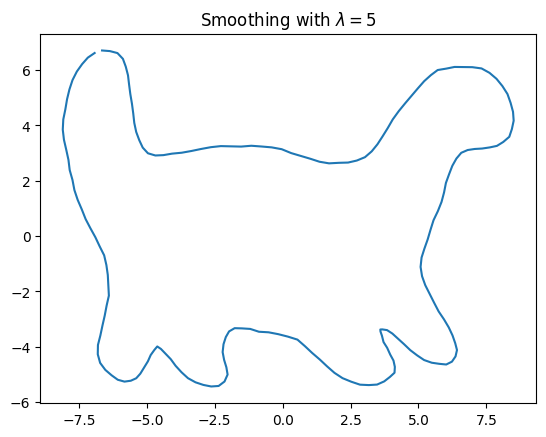

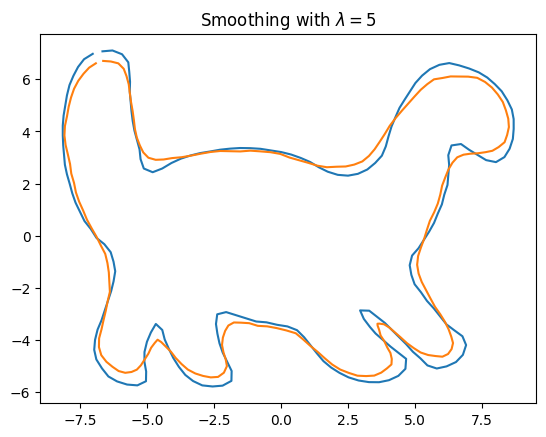

In [205]:
smoothing_equation_1_12(data, LAMBDA=5, true_data=true_data)

#### Impementing equation 1.13 

$$ X_{new} = (I + \lambda A - \beta B )^{-1} X $$

In [242]:
def smoothing_equation_1_13(data, LAMBDA=0.5, BETA=0.5, true_data=None):
    # A matrix 
    N = data.shape[0]
    A = np.zeros(N)
    A[0] = -2
    A[1] = 1
    A[-1] = 1
    A = circulant(L)

    # B matrix 
    B = np.zeros(N)
    B[0] = -6
    B[1] = 4
    B[2] = -1
    B[-1] = 4
    B[-2] = -1
    B = circulant(B)

    #print(B)

    I = np.eye(N)
    X_new = np.linalg.inv(I - LAMBDA * L - BETA * B) @ data

    # Plot results
    plt.figure()
    plt.plot(X_new[:, 0], X_new[:, 1], '-', label="Smoothed Curve")

    if true_data is not None:
        plt.plot(true_data[:, 0], true_data[:, 1], '-', label="Ground Truth", alpha=0.7)

    plt.title(rf"Smoothing with $\lambda={LAMBDA}$ and $\beta={BETA}$")
    plt.legend()
    plt.show()


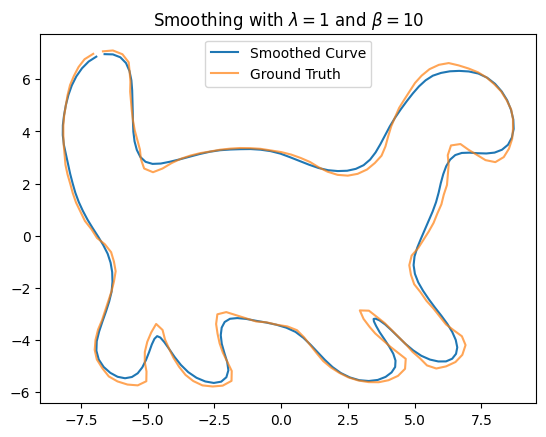

In [243]:
smoothing_equation_1_13(data, LAMBDA=1, BETA=10, true_data=true_data)

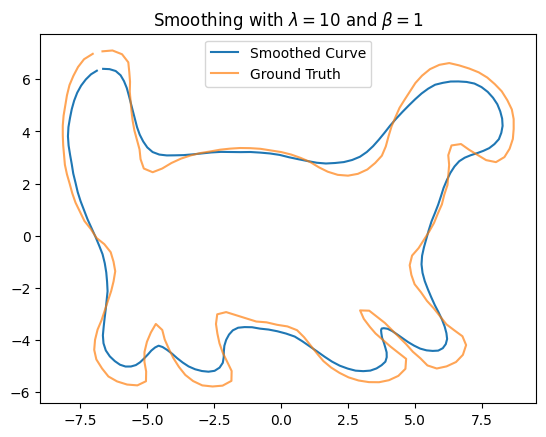

: 

In [244]:
smoothing_equation_1_13(data, LAMBDA=10, BETA=1, true_data=true_data)